In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import zipfile

zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [3]:
import os


for dirpath, dirname, filename in os.walk("10_food_classes_10_percent"):
    print(f"There are {len(dirname)} directories and {len(filename)} images in {dirpath}")

There are 2 directories and 0 images in 10_food_classes_10_percent
There are 10 directories and 0 images in 10_food_classes_10_percent\test
There are 0 directories and 250 images in 10_food_classes_10_percent\test\chicken_curry
There are 0 directories and 250 images in 10_food_classes_10_percent\test\chicken_wings
There are 0 directories and 250 images in 10_food_classes_10_percent\test\fried_rice
There are 0 directories and 250 images in 10_food_classes_10_percent\test\grilled_salmon
There are 0 directories and 250 images in 10_food_classes_10_percent\test\hamburger
There are 0 directories and 250 images in 10_food_classes_10_percent\test\ice_cream
There are 0 directories and 250 images in 10_food_classes_10_percent\test\pizza
There are 0 directories and 250 images in 10_food_classes_10_percent\test\ramen
There are 0 directories and 250 images in 10_food_classes_10_percent\test\steak
There are 0 directories and 250 images in 10_food_classes_10_percent\test\sushi
There are 10 directori

In [4]:
import tensorflow as tf

In [5]:
import tensorflow_hub as tf_hub

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
size = 32
shape = (224,224)

train_data = train_datagen.flow_from_directory(train_dir, batch_size=size, target_size=shape, class_mode='categorical')
test_data = test_datagen.flow_from_directory(test_dir, batch_size=size, target_size=shape, class_mode='categorical')

Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import TensorBoard

In [10]:
mobilenet_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/5"

In [11]:
import datetime

def tb_callback(dir_name, exp_name):
    log_dir = dir_name + "/" + exp_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tb_callback = TensorBoard(log_dir=log_dir)
    
    print(f"Saving TensorBoard log files to: {log_dir}")
    
    return tb_callback

In [12]:
def create_model(url, num_classes):
    featurn_extraction_layer = tf_hub.KerasLayer(url, name="feature_Extraction_Layer",trainable=False, 
                                                input_shape= shape+(3,))
    
    model = Sequential([
        featurn_extraction_layer,
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    
    return model

In [13]:
def plot_loss_curve(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    
    epochs = range(len(history.history['loss']))
    
    plt.plot(epochs, loss, label='Training Data')
    plt.plot(epochs, val_loss, label="Test Data")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()
    
    plt.figure()
    plt.plot(epochs, accuracy, label="Training Data")
    plt.plot(epochs, val_accuracy, label="Test Data")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend();

In [14]:
mobile_net_model = create_model(mobilenet_url, num_classes= train_data.num_classes)

In [15]:
mobile_net_model.compile( loss=CategoricalCrossentropy(), metrics='accuracy', optimizer='adam')

In [16]:
mobile_net_model

In [17]:
mobile_net_model_history = mobile_net_model.fit(train_data, validation_data=test_data, epochs=5, 
                                                steps_per_epoch=len(train_data), validation_steps=len(test_data),
                                               callbacks=[tb_callback(dir_name="mobile_net_tf_hub", exp_name="MobileNet")])

Saving TensorBoard log files to: mobile_net_tf_hub/MobileNet/20230107-232506
Epoch 1/5
24/24 [==============================] - 91s 4s/step - loss: 1.9796 - accuracy: 0.3293 - val_loss: 1.3385 - val_accuracy: 0.6004
Epoch 2/5
24/24 [==============================] - 62s 3s/step - loss: 1.0395 - accuracy: 0.6800 - val_loss: 0.9150 - val_accuracy: 0.7392
Epoch 3/5
24/24 [==============================] - 63s 3s/step - loss: 0.7355 - accuracy: 0.7960 - val_loss: 0.7654 - val_accuracy: 0.7688
Epoch 4/5
24/24 [==============================] - 61s 3s/step - loss: 0.5777 - accuracy: 0.8547 - val_loss: 0.6857 - val_accuracy: 0.7908
Epoch 5/5
24/24 [==============================] - 62s 3s/step - loss: 0.4681 - accuracy: 0.8933 - val_loss: 0.6548 - val_accuracy: 0.7916


In [19]:
mobile_net_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_Extraction_Layer (K  (None, 1280)             2257984   
 erasLayer)                                                      
                                                                 
 dense (Dense)               (None, 10)                12810     
                                                                 
Total params: 2,270,794
Trainable params: 12,810
Non-trainable params: 2,257,984
_________________________________________________________________


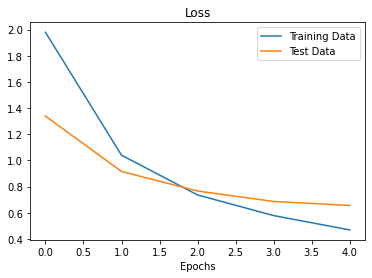

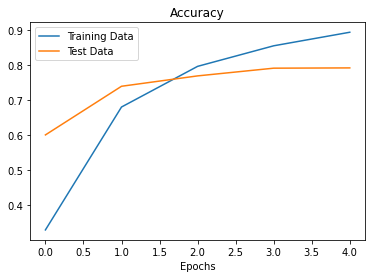

In [20]:
plot_loss_curve(mobile_net_model_history)